In [3]:
dataset_path = "../Dataset/NP_Data/"

!ls "../Dataset/NP_Data"

pronographicX331.npy  pronographicY331.npy


In [4]:
import numpy as np

Xs = np.load(dataset_path+ "pronographicX331.npy")
Ys = np.load(dataset_path+ "pronographicY331.npy")

print(Xs.shape, Ys.shape)

(1400, 331, 331, 3) (1400,)


In [155]:
indexs = [0, 12,38, 47, 284]
Xs_aug = Xs[indexs]
Ys_aug = Ys[indexs]

0


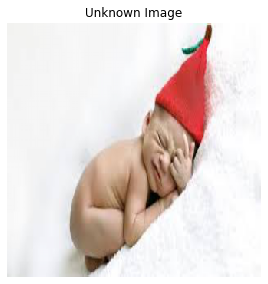

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

index_img = 1

plt.subplot(1,2,1)
plt.axis('off')
plt.title('Unknown Image')
plt.imshow(Xs_aug[index_img]/255)
print(Ys[index_img])


plt.show()

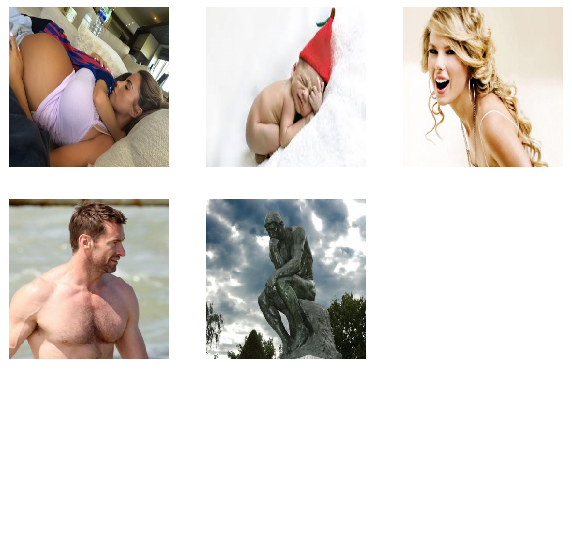

In [198]:
def show_most_simm(Xs, fig_row, fig_col, sz=10, show=True):
  
    plt.figure(figsize=(sz,sz))
    for i in range(0, ((fig_row * fig_col)+1)):
        try:
            plt.axis('off')
            plt.subplot(fig_row, fig_col, i+1)   
            plt.imshow(Xs[i]/255)
            
        except:
            pass
    if show:
        plt.show()

n = 0
show_most_simm(Xs_aug[n:n+10], 3, 3)

In [118]:
from keras.preprocessing.image import ImageDataGenerator
from keras import utils as keras_utils
import keras

genImage = ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5])
        

In [207]:
imgs = [[], [], [], [], []]
for i in range(5):
    it = genImage.flow(np.array([Xs_aug[i]]), np.array([Ys_aug[i]]))
    imgs[i].append(Xs_aug[i])
    for t in range(5):
        imgb = it.next()
        print(imgb[0].shape)
        for j in range(imgb[0].shape[0]):
            imgs[i].append(imgb[0][j])
        
images = []
for img in imgs:
    images.extend(img)

(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)
(1, 331, 331, 3)


5 30


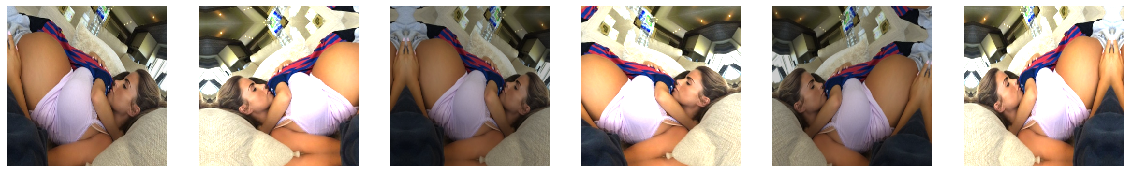

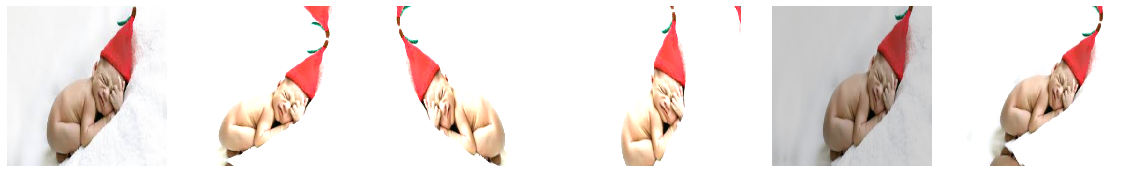

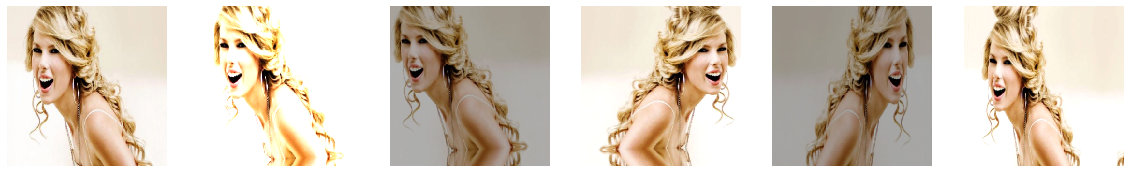

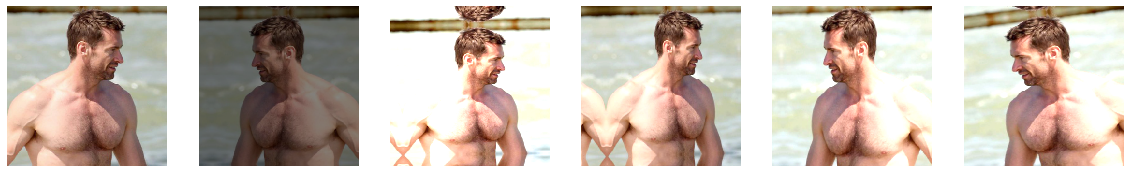

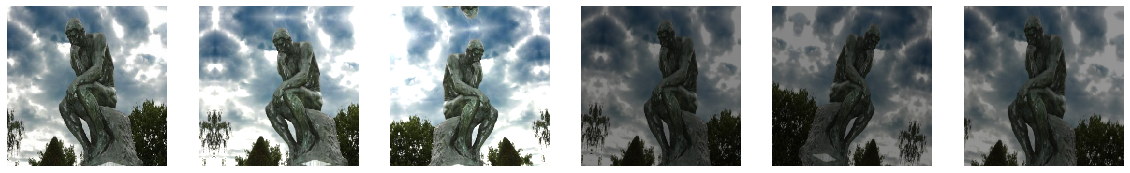

In [208]:
print(len(imgs), len(images))
for j in range(5):
    n = j*6
    show_most_simm(images[n:n+10], 1, 6, sz=20, show=False)
plt.show()